In [1]:
import openmc

## Week 1

OpenMC has three basic data structures that are used in the Monte Carlo Simulation
- Materials
- Geometry
- Settings

In [2]:
# Materials
mymat = openmc.Material()
mymat.add_element('U', percent=0.333, enrichment=5.0)
mymat.add_element('O', percent=0.666, percent_type='ao')


fuel = mymat

In [3]:
fuel.set_density('g/cm3', density=10.5)

In [4]:
water = openmc.Material(name='water')
water.add_element('H', percent=0.666)
water.add_element('O', percent=0.333)

In [5]:
water.set_density('g/cm3', density=1.0)

In [6]:
mats = openmc.Materials([fuel, water])
mats.export_to_xml()

In [7]:
# Geometry
geo = openmc.Geometry()

s1 = openmc.ZCylinder(r=1.5)
c1 = openmc.Cell(region=-s1, name='fuel')
c1.fill = fuel

In [8]:
bb = openmc.model.rectangular_prism(5.0, 5.0, boundary_type='reflective')
c2 = openmc.Cell(region=(+s1 & bb), name='water')
c2.fill = water

In [9]:
univ = openmc.Universe(cells=[c1, c2])

In [10]:
geo.root_universe = univ

In [11]:
geo.export_to_xml()

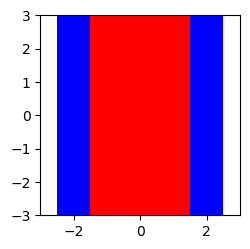

In [12]:
# Visualize Geometry
colormap = {fuel: 'red', water: 'blue'}
univ.plot(width=(6,6), colors=colormap, color_by='material',
         basis='xz')

In [13]:
plots = openmc.Plots()

In [14]:
myplot = openmc.Plot()
myplot.basis = 'xy'
myplot.width = (5, 5)
myplot.color_by = 'material'
myplot.colors = colormap


In [15]:
plots.append(myplot)

In [16]:
myplot = openmc.Plot()
myplot.basis = 'xz'
myplot.width = (5, 5)
myplot.color_by = 'material'
myplot.colors = colormap

In [17]:
plots.export_to_xml()

In [18]:
# Settings
settings = openmc.Settings()
settings.particles = 1000
settings.batches = 50
settings.inactive = 10
settings.seed = 5

settings.export_to_xml()

In [19]:
# Tallies
fission = openmc.Tally(name='fission')

Now we need to create a filter!

In [31]:
# Create mesh which will be used for tally
mesh = openmc.RegularMesh()
mesh.dimension = [100, 100]
mesh.lower_left = [-3, -3]
mesh.upper_right = [3, 3]

# Create mesh filter for tally
mesh_filter = openmc.MeshFilter(mesh)

In [32]:
fission.filters = [mesh_filter]
fission.nuclides = fuel.get_nuclides()

In [33]:
fission.scores = ['fission', 'absorption', '(n,gamma)']

In [34]:
tallies = openmc.Tallies([fission])

In [35]:
tallies.export_to_xml()

In [38]:
# Run OpenMC
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [39]:
# Process Results
sp = openmc.StatePoint('statepoint.50.h5')

In [40]:
tally_res = sp.get_tally()

In [41]:
fission = tally_res.get_slice(scores=['fission'])

In [42]:
import matplotlib.pyplot as plt

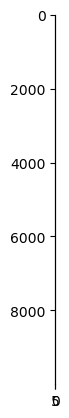

In [43]:
fig = plt.subplot(121)
fig.imshow(fission.mean)